# Data Analytics framework

In [142]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})

In [143]:
data = load_breast_cancer()

In [144]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])

In [145]:
df['Target'] = data['target']

In [146]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## Pre-processing

### Feature selection

Mutual information

In [117]:
from sklearn.feature_selection import mutual_info_classif as MIC

In [118]:
#mi_score = MIC(X,y)
#mi_score_selected_index = np.where(mi_scores >0.2)[0]
#X_2 = X[:,mi_score_selected_index]

In [119]:
from sklearn.feature_selection import SelectPercentile as SP

In [120]:
#selector = SP(percentile=50) # select features with top 50% MI scores
#selector.fit(X,y)
#X_4 = selector.transform(X)

Linear dependence correlation - Piora a performance

In [92]:
#corr = .9 # Correlations higher than .9

In [93]:
#cor_matrix = df.corr().abs()

In [94]:
# Upper correlations
#upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr)]

<ipython-input-94-0c66d265f85c>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [95]:
#df = df.drop(columns = to_drop)

In [96]:
# Cria a matrix de correlações
#Var_Corr = X.corr()
# plot the heatmap and annotation on it
#g = sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, 
#                yticklabels=Var_Corr.columns, 
#                annot=True,linewidths=.5, 
#                cmap = "Spectral")
#g.tick_params(labelsize=17)

### Outliers treatment

Grubbs test

In [122]:
from outliers import smirnov_grubbs as grubbs

In [123]:
for col in df.drop(columns = 'Target').columns:
    print(col)
    max_out = grubbs.max_test_outliers(np.array(df[col]), alpha=.05)
    min_out = grubbs.min_test_outliers(np.array(df[col]), alpha=.05)
    if len(max_out) > 0:
        print('Max outliers > ', min(max_out))
        df = df[df[col] < min(max_out)]
    if len(min_out) > 0:
        print('Min outliers < ', max(min_out))
        df = df[df[col] > max(min_out)]

mean radius
Max outliers >  27.22
mean texture
Max outliers >  39.28
mean perimeter
mean area
Max outliers >  1841.0
mean smoothness
Max outliers >  0.1634
mean compactness
Max outliers >  0.3114
mean concavity
Max outliers >  0.3514
mean concave points
mean symmetry
Max outliers >  0.304
mean fractal dimension
Max outliers >  0.08743
radius error
Max outliers >  1.167
texture error
Max outliers >  3.568
perimeter error
Max outliers >  7.561
area error
Max outliers >  122.3
smoothness error
Max outliers >  0.01736
compactness error
Max outliers >  0.07217
concavity error
Max outliers >  0.09252
concave points error
Max outliers >  0.02765
symmetry error
Max outliers >  0.04183
fractal dimension error
Max outliers >  0.008925
worst radius
worst texture
Max outliers >  49.54
worst perimeter
worst area
Max outliers >  2398.0
worst smoothness
Max outliers >  0.2184
worst compactness
Max outliers >  0.709
worst concavity
Max outliers >  0.9034
worst concave points
worst symmetry
Max outlier

### Normalization

Box-Cox transformation

In [ ]:
from scipy import stats

In [ ]:
#df['mean radius2'] = stats.boxcox(df['mean radius'])[0]

In [ ]:
#for col in df.drop(columns = 'Target').columns:
#    print(col)
#    df[col] = stats.boxcox(df[col])[0]

Logaritimic transformation

In [ ]:
#for col in df.drop(columns = 'Target').columns:
#    df[col] = np.log(df[col])

### Scaling

In [147]:
from sklearn.preprocessing import RobustScaler

In [148]:
# Tem que ser utilizado
X = df.drop(columns = 'Target')

In [149]:
scaler = RobustScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

### PCA

In [150]:
from sklearn.decomposition import PCA

(569, 30)
[4.49425090e-01 1.95785175e-01 1.02761806e-01 5.59722770e-02
 4.59624040e-02 3.81427364e-02 2.63802548e-02 1.57821038e-02
 1.47126117e-02 1.07994934e-02 9.54796641e-03 7.63783083e-03
 6.68547007e-03 4.41598763e-03 2.99255528e-03 2.90640784e-03
 2.18040563e-03 1.80286497e-03 1.41869772e-03 9.69255922e-04
 9.26905966e-04 7.03267080e-04 6.27666106e-04 5.55091017e-04
 4.13912989e-04 2.51211195e-04 1.67719082e-04 4.60962806e-05
 2.29974838e-05 3.73773442e-06]
['PC01', 'PC02', 'PC03', 'PC04', 'PC05', 'PC06', 'PC07', 'PC08', 'PC09', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30']


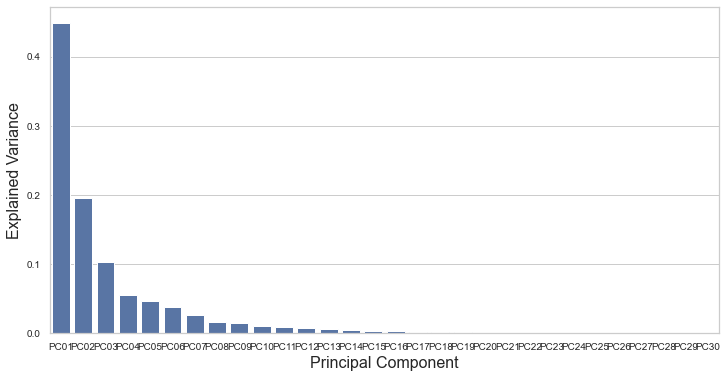

In [151]:
nPCA = len(X.columns)

pcaAll = PCA(n_components = nPCA)
pcaAll.fit(scaled_data)
x_pca_All = pcaAll.transform(scaled_data)
print(x_pca_All.shape)
print(pcaAll.explained_variance_ratio_)

pc_names= []

for i in range(nPCA):
    pc_names.append("PC%0.2d" % (i+1))
    
print(pc_names)
    
    
sns.set_theme(style="whitegrid")
plt.figure(figsize = (12,6))
ax = sns.barplot(x=pc_names, y=pcaAll.explained_variance_ratio_, color='b')
plt.tick_params(labelsize=10)
plt.xlabel('Principal Component', size = 16)
plt.ylabel('Explained Variance', size = 16)
plt.show()

In [152]:
pcaAll.explained_variance_ratio_[:17].sum()

0.9920905764512924

In [153]:
nPCA = 16

pca = PCA(n_components = nPCA)
pca.fit(scaled_data)
X_pca = pca.transform(scaled_data)
X_pca = pd.DataFrame(X_pca)

## Number of clusters

In [154]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [155]:
#X = df.drop(columns = 'Target')
X = X_pca
#X = scaled_data

Elbow method

In [15]:
K = range(2,10)

sqr_distances = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0)
    #model = KMedoids(n_cluster = k, random_satate = 0)
    k_means = model.fit(X)
    sqr_distances.append(k_means.inertia_)

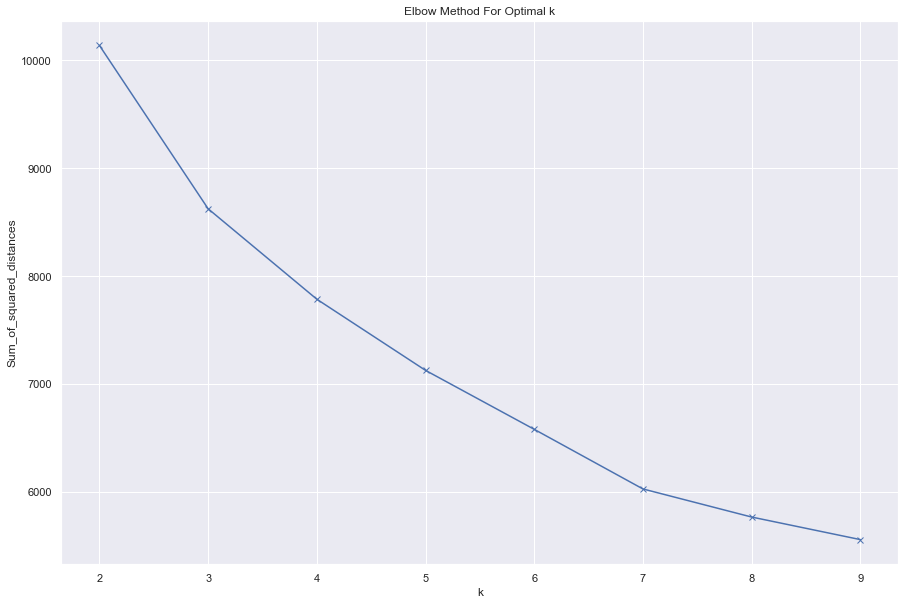

In [16]:
plt.plot(K, sqr_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Sillhouett method

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [18]:
K = range(2,10)

for k in K:
    #model = KMeans(n_clusters=k, random_state=0)
    model = KMedoids(n_clusters = k, random_state = 0)
    cluster_labels = model.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For k =",
        k,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For k = 2 The average silhouette_score is : 0.3556049203757369
For k = 3 The average silhouette_score is : 0.25289397445784384
For k = 4 The average silhouette_score is : 0.12091333922570786
For k = 5 The average silhouette_score is : 0.13829778513616076
For k = 6 The average silhouette_score is : 0.07976932736208397
For k = 7 The average silhouette_score is : 0.06081493500334703
For k = 8 The average silhouette_score is : 0.06985660721152492
For k = 9 The average silhouette_score is : 0.05119759362633697


## Clustering (ML modelling)

In [156]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids # !pip install scikit-learn-extra
from sklearn.cluster import DBSCAN 
from sklearn.cluster import AgglomerativeClustering # !pip install fuzzy-c-means
from fcmeans import FCM # !pip install fuzzy-c-means

In [157]:
k = 2

Models

In [158]:
#model = FCM(n_clusters=k)
#model = AgglomerativeClustering(n_clusters = k, linkage = 'average')
model = KMeans(n_clusters= k, random_state=0)
#model = KMedoids(n_clusters= k, random_state=0)
#model = DBSCAN(eps= .2, min_samples= 7)

In [159]:
model.fit(X)

KMeans(n_clusters=2, random_state=0)

In [160]:
labels = model.predict(X)

In [161]:
df['Cluster'] = labels
#X['Cluster'] = labels

In [162]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target,Cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1


### Visualization

In [163]:
from sklearn.metrics import confusion_matrix

In [164]:
confusion_matrix(df['Target'], labels)

array([[ 52, 160],
       [351,   6]], dtype=int64)

In [ ]:
g = sns.PairGrid(X, hue= 'Cluster',diag_sharey=False, corner=True, palette='tab10')
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.add_legend()

In [ ]:
for cluster in clusters['Cluster'].unique():
    print('Cluster: ', cluster)
    print(clusters[clusters['Cluster'] == cluster].describe())
    print('\n')